# ***Predictive Quality in Additive Manufacturing***

Week 1: Data exploration
 Which structure has the production system? Are all features present for all products?
 Which product clusters can be identified based on the existence of features? Do features
 correlate? Are there outliers in the features?

## Data import and visualization

All necessary packages 

In [ ]:
!pip install openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches

In [10]:
# change data_path according to the path of data
current_path = os.getcwd()
print("current pth:", current_path)
#data_path = os.path.dirname(current_path)
if os.path.exists("02_Data"):
    data_path = ("02_Data")
    print("Data has been founded at:", data_path)
else:
    print("Can`t find Data")
Audio_path = os.path.join(data_path,"01_Audio")
#print("Audio:", Audio_path)
Audio_files = [ f for f in os.listdir(Audio_path) if f.endswith(".csv")]
print("Audio_files are: ", Audio_files)
list_Audio = []
id_Audio = []
for file_name in Audio_files:
    file_path = os.path.join(Audio_path,file_name)
    #get data
    df = pd.read_csv(file_path)
    list_Audio.append(df)
    #get data id
    id_Audio.append(int(os.path.splitext(os.path.basename(file_path))[0]))
print("Audio_len: ",len(list_Audio))
print("shape of list_Audio:", list_Audio[0].shape) 


Weldqas_path = os.path.join(data_path,"02_Weldqas")
Weldqas_files = [ j for j in os.listdir(Weldqas_path) if j.endswith(".csv")]
print("Weldqas_files are: ", Weldqas_files)
list_Weldqas = []
for file_name in Weldqas_files:
    file_path = os.path.join(Weldqas_path,file_name)
    df = pd.read_csv(file_path)
    list_Weldqas.append(df)
print("Weldqas_len: ",len(list_Weldqas))
print("shape of list_Weldqas:", list_Weldqas[0].shape) 
##get the path o excel
excel_paths = []
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith(".xlsx"):
            excel_paths.append(os.path.join(data_path,file))
print(excel_paths)

current pth: c:\Users\13370\Desktop\SS25\KI_in_der_Produktionstechnik\Project\PQAM
Data has been founded at: 02_Data
Audio_files are:  ['169.csv', '170.csv', '171.csv', '172.csv', '173.csv', '174.csv', '175.csv', '176.csv', '177.csv', '178.csv', '179.csv', '180.csv', '181.csv', '182.csv', '183.csv', '184.csv', '185.csv', '186.csv', '187.csv', '188.csv', '189.csv', '190.csv', '191.csv', '192.csv', '193.csv', '194.csv', '195.csv', '196.csv', '197.csv', '198.csv', '199.csv', '200.csv', '201.csv', '202.csv', '203.csv', '204.csv', '205.csv', '206.csv', '207.csv', '208.csv', '209.csv', '210.csv', '211.csv', '212.csv', '213.csv', '214.csv', '215.csv', '216.csv', '217.csv', '218.csv', '219.csv', '220.csv', '221.csv', '222.csv', '223.csv', '224.csv', '225.csv', '226.csv', '227.csv', '228.csv', '229.csv', '230.csv', '231.csv', '232.csv', '233.csv', '234.csv', '235.csv', '236.csv', '237.csv', '238.csv', '239.csv', '240.csv', '241.csv', '242.csv', '243.csv', '244.csv', '245.csv', '246.csv', '247.c

# Read Excel

In [5]:
#get the header of table
excel_df = pd.read_excel(excel_paths[0], sheet_name=0,skiprows=10)
print(excel_df.columns)
df_Usage = excel_df[["Number of Measurement",'Dataset']]
"""
Audio_df_without_label = pd.DataFrame({
    "Number of Measurement": id_Audio,
    "DAta of Audio": list_Audio
})
"""
label_map = dict(zip(df_Usage["Number of Measurement"], df_Usage["Dataset"]))

# conbine csv data with excel
audio_list_with_labels = []

for id_, audio in zip(id_Audio, list_Audio):
    label = label_map.get(id_, None)  
    audio_list_with_labels.append({
        "id": id_,
        "audio": audio,
        "label": label
    })


Index(['Unnamed: 0', 'Number of Measurement', 'Experiment', 'Process',
       'Usable', 'Dataset', 'Audio', 'Currency I [A]', 'Time [ms]',
       'Eintauchmaß p [mm]', 'Hub h [mm]', 'Forced Error Type',
       'Coaxial Offset [mm]', 'Tilt [°]', 'Notes'],
      dtype='object')


In [6]:
print(audio_list_with_labels[0])

{'id': 169, 'audio':          Unnamed: 0       Time    M
0                 0   0.000000   28
1                 1   0.000021   26
2                 2   0.000042   23
3                 3   0.000063   27
4                 4   0.000083   22
...             ...        ...  ...
1021947     1021947  21.290563  216
1021948     1021948  21.290583  227
1021949     1021949  21.290604  242
1021950     1021950  21.290625  249
1021951     1021951  21.290646  263

[1021952 rows x 3 columns], 'label': 'iO'}


audio_list_with_labels is the combination of audio and label

# Audio part

### read function to read a single file and print it out

In [7]:
# read single file
#file_path = os.path.join(Audio_path,"169.csv")
#df = pd.read_csv(file_path)
#pd.set_option('display.max_rows', None)
def ReadSingleAudio(id_Audio):
    for sample in audio_list_with_labels:
        
        if sample['id'] == id_Audio:
                 
            df = pd.DataFrame({
                "Measurement": sample['audio']['M'],
                "Time":sample['audio']['Time'],
                
                })
            
            print(df)
            #df.info()
            x = df["Time"]
            y = df["Measurement"]
            plt.figure(figsize=(30, 4)) 
            plt.plot(x,y)

            plt.xlabel("Time (s)")
            plt.ylabel("Measurement ")
            plt.title(f" Audio ID : {id_Audio} | Label :{sample['label']}")
            plt.show()




        Measurement      Time
0              -122  0.000000
1              -120  0.000021
2              -119  0.000042
3              -122  0.000063
4              -137  0.000083
...             ...       ...
232443          313  4.842562
232444          310  4.842583
232445          312  4.842604
232446          304  4.842625
232447          300  4.842646

[232448 rows x 2 columns]


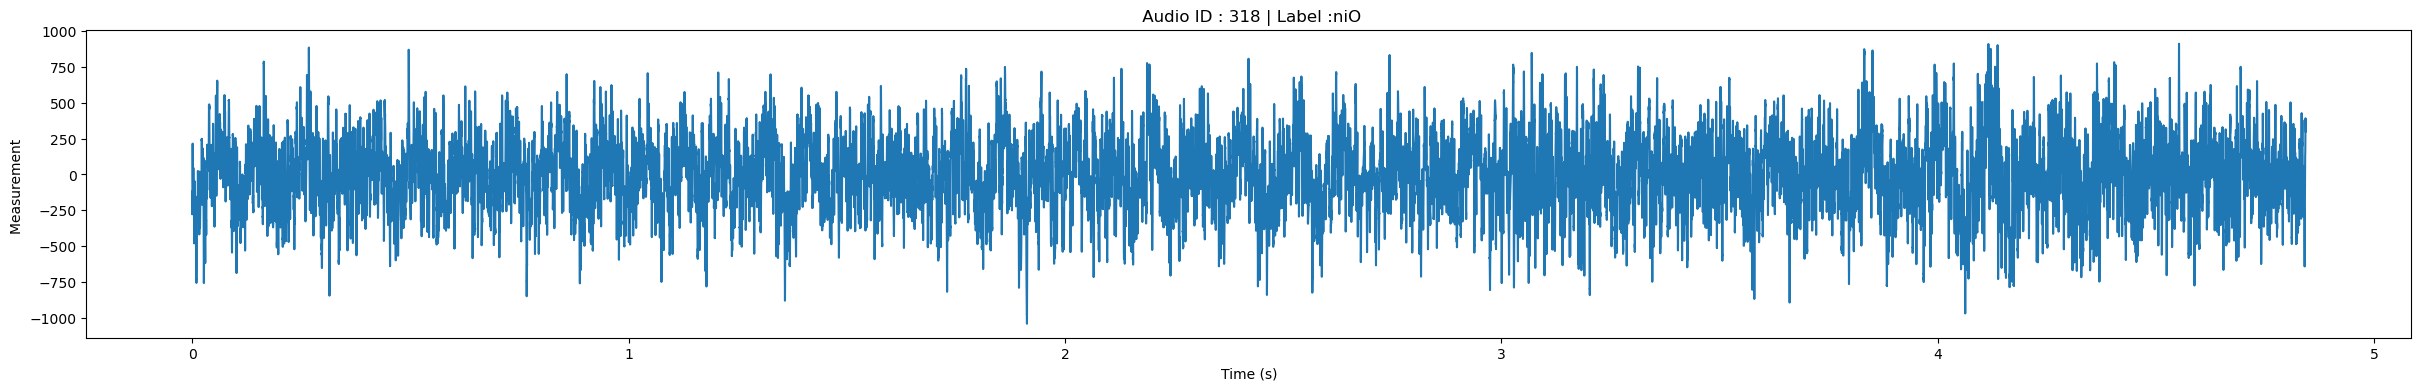

In [8]:
ReadSingleAudio(318)

### High-pass fliter

[ 30.52215036  30.30919222  29.16472542 ... -12.9359497  -10.05499888
  -0.46627602]


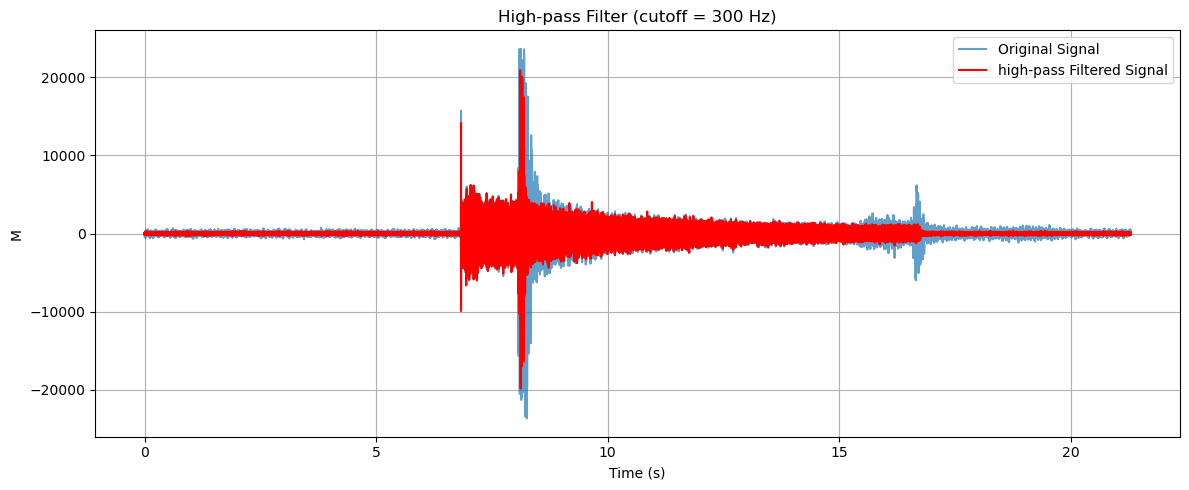

In [30]:
# create high-pass filter to dinimish background noise
from scipy.signal import butter, filtfilt

#Read the CSV file
file_path = os.path.join(Audio_path,"169.csv")
df = pd.read_csv(file_path)

# Extracting the 'Time' and 'M' columns
t = df['Time']
m = df['M']

#define high-pass filter
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs              # Nyquist frequency
    normal_cutoff = cutoff / nyq                # Normalize the cutoff frequency
    b, a = butter(order, normal_cutoff, btype='high', analog=False)             #filter coefficients
    return b, a

#define high-pass filter function
def highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)             #get filter coefficients
    y = filtfilt(b, a, data)                #Apply zero-phase filtering to avoid phase distortion
    return y

#Calculate the sampling frequency from the time data
fs = 1 / (t[1] - t[0])              # Sampling frequency
cutoff = 300               # Cutoff frequency in Hz

# Apply the high-pass filter to the signals
m_filtered = highpass_filter(m, cutoff, fs, order=3)
print(m_filtered)
#Plot the original and filtered signals
plt.figure(figsize=(12, 5))
plt.plot(t, m, label='Original Signal', alpha=0.7)
plt.plot(t, m_filtered, label='high-pass Filtered Signal', color='red')
plt.xlabel('Time (s)')
plt.ylabel('M')
plt.title(f'High-pass Filter (cutoff = {cutoff} Hz)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### FFT

Estimated sampling rate (sr): 48000 Hz


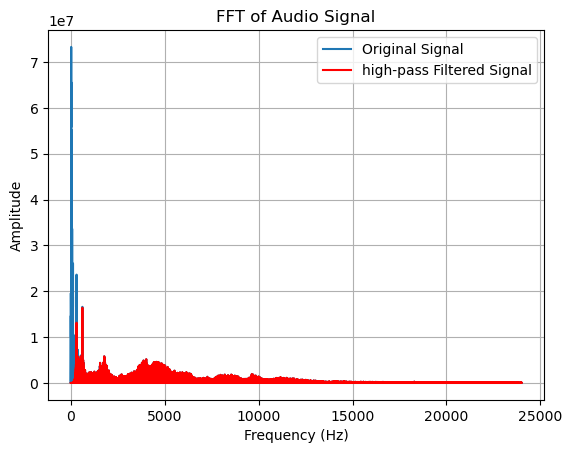

[0.00000000e+00 4.69689379e-02 9.39378758e-02 ... 2.39998591e+04
 2.39999061e+04 2.39999530e+04] 450211.44579391606 73283746.93857527


In [34]:
# FFT
file_path = os.path.join(Audio_path,"169.csv")
df = pd.read_csv(file_path)
# Perform the Fast Fourier Transform (FFT) on the audio signal in column "M"
Y = np.fft.fft(df["M"])
# Compute the frequency bins corresponding to the FFT result
# Estimated sampling rate based on test data
delta_t = df["Time"][1] - df["Time"][0]
sr = round(1 / delta_t)
print(f"Estimated sampling rate (sr): {sr} Hz")

frequencies = np.fft.fftfreq(len(df["M"]), d=1/sr)
#apply high-pass filter
cutoff = 300
m_filtered = highpass_filter(df["M"], cutoff, sr, order=3)
filtered_frequencies = np.fft.fft(m_filtered)

#print(m_filtered)
# Plot the magnitude spectrum (only the positive half of frequencies and amplitudes)
plt.plot(frequencies[:len(frequencies)//2], np.abs(Y)[:len(Y)//2], label='Original Signal')
plt.plot(frequencies[:len(frequencies)//2], np.abs(filtered_frequencies)[:len(filtered_frequencies)//2], label='high-pass Filtered Signal', color='red')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("FFT of Audio Signal")
plt.legend()
plt.grid(True)
plt.show()

peak_freq = frequencies[:len(frequencies)//2]
mean_amp = np.mean(np.abs(Y[:len(Y)//2]))
max_amp = np.max(np.abs(Y[:len(Y)//2]))

print(peak_freq, mean_amp, max_amp)


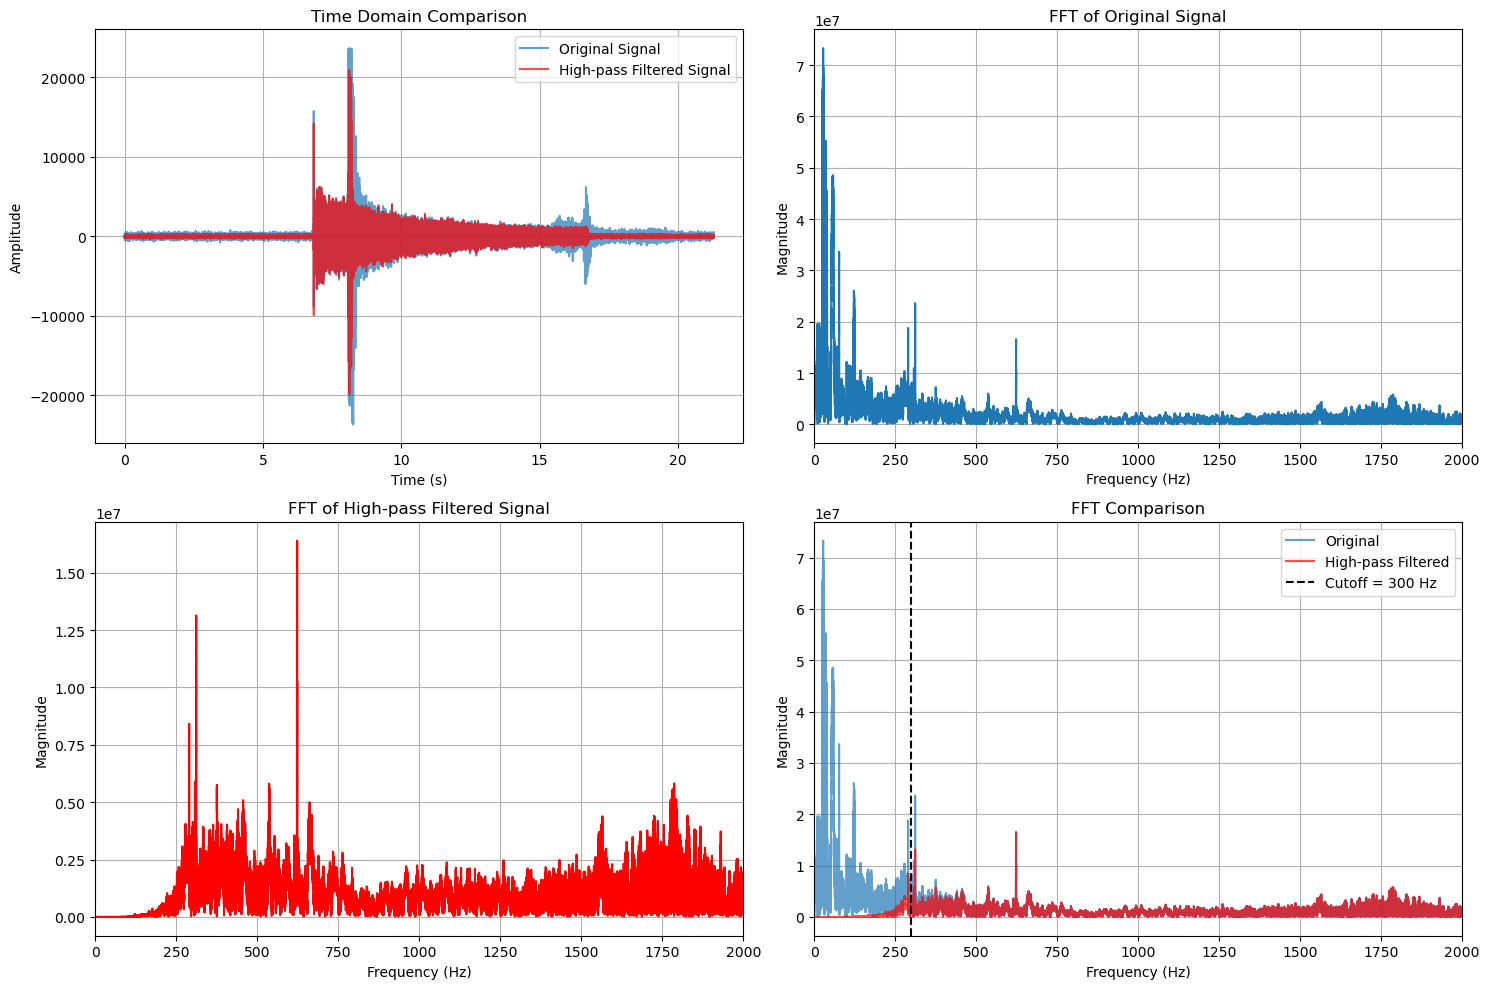

采样频率: 48000.0 Hz
截止频率: 300 Hz

原始信号:
  低频能量 (<300Hz): 9.46e+17
  高频能量 (≥300Hz): 2.07e+17

滤波后信号:
  低频能量 (<300Hz): 4.45e+15
  高频能量 (≥300Hz): 1.95e+17

滤波效果:
  低频能量减少: 99.5%
  高频能量保持: 94.0%


In [33]:
# 使用您的高通滤波器代码
from scipy.signal import butter, filtfilt
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
file_path = os.path.join(Audio_path, "169.csv")
df = pd.read_csv(file_path)
t = df['Time']
m = df['M']

# 您的高通滤波器函数（保持不变）
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# 计算采样频率
fs = 1 / (t[1] - t[0])
cutoff = 300

# 应用高通滤波器
m_filtered = highpass_filter(m, cutoff, fs, order=3)

# 计算FFT - 原始信号和滤波后信号
Y_original = np.fft.fft(m)
Y_filtered = np.fft.fft(m_filtered)
frequencies = np.fft.fftfreq(len(m), d=1/fs)

# 只取正频率部分
pos_freq_idx = frequencies >= 0
frequencies_pos = frequencies[pos_freq_idx]
Y_original_pos = Y_original[pos_freq_idx]
Y_filtered_pos = Y_filtered[pos_freq_idx]

# 创建对比图
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 时域对比
axes[0, 0].plot(t, m, label='Original Signal', alpha=0.7)
axes[0, 0].plot(t, m_filtered, label='High-pass Filtered Signal', color='red', alpha=0.7)
axes[0, 0].set_xlabel('Time (s)')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].set_title('Time Domain Comparison')
axes[0, 0].legend()
axes[0, 0].grid(True)

# 频域 - 原始信号
axes[0, 1].plot(frequencies_pos, np.abs(Y_original_pos))
axes[0, 1].set_xlabel('Frequency (Hz)')
axes[0, 1].set_ylabel('Magnitude')
axes[0, 1].set_title('FFT of Original Signal')
axes[0, 1].set_xlim(0, 2000)  # 限制显示范围以便观察
axes[0, 1].grid(True)

# 频域 - 滤波后信号
axes[1, 0].plot(frequencies_pos, np.abs(Y_filtered_pos), color='red')
axes[1, 0].set_xlabel('Frequency (Hz)')
axes[1, 0].set_ylabel('Magnitude')
axes[1, 0].set_title('FFT of High-pass Filtered Signal')
axes[1, 0].set_xlim(0, 2000)
axes[1, 0].grid(True)

# 频域叠加对比
axes[1, 1].plot(frequencies_pos, np.abs(Y_original_pos), label='Original', alpha=0.7)
axes[1, 1].plot(frequencies_pos, np.abs(Y_filtered_pos), label='High-pass Filtered', color='red', alpha=0.7)
axes[1, 1].axvline(x=cutoff, color='black', linestyle='--', label=f'Cutoff = {cutoff} Hz')
axes[1, 1].set_xlabel('Frequency (Hz)')
axes[1, 1].set_ylabel('Magnitude')
axes[1, 1].set_title('FFT Comparison')
axes[1, 1].set_xlim(0, 2000)
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

# 分析滤波效果
print(f"采样频率: {fs:.1f} Hz")
print(f"截止频率: {cutoff} Hz")

# 计算低频和高频的能量
low_freq_mask = frequencies_pos < cutoff
high_freq_mask = frequencies_pos >= cutoff

# 原始信号的低频和高频能量
low_energy_orig = np.sum(np.abs(Y_original_pos[low_freq_mask])**2)
high_energy_orig = np.sum(np.abs(Y_original_pos[high_freq_mask])**2)

# 滤波后信号的低频和高频能量
low_energy_filt = np.sum(np.abs(Y_filtered_pos[low_freq_mask])**2)
high_energy_filt = np.sum(np.abs(Y_filtered_pos[high_freq_mask])**2)

print(f"\n原始信号:")
print(f"  低频能量 (<{cutoff}Hz): {low_energy_orig:.2e}")
print(f"  高频能量 (≥{cutoff}Hz): {high_energy_orig:.2e}")

print(f"\n滤波后信号:")
print(f"  低频能量 (<{cutoff}Hz): {low_energy_filt:.2e}")
print(f"  高频能量 (≥{cutoff}Hz): {high_energy_filt:.2e}")

print(f"\n滤波效果:")
print(f"  低频能量减少: {(1 - low_energy_filt/low_energy_orig)*100:.1f}%")
print(f"  高频能量保持: {(high_energy_filt/high_energy_orig)*100:.1f}%")

### Apply filter on all Data

In [ ]:
print(audio_list_with_labels)

[{'id': 169, 'audio':          Unnamed: 0       Time    M
0                 0   0.000000   28
1                 1   0.000021   26
2                 2   0.000042   23
3                 3   0.000063   27
4                 4   0.000083   22
...             ...        ...  ...
1021947     1021947  21.290563  216
1021948     1021948  21.290583  227
1021949     1021949  21.290604  242
1021950     1021950  21.290625  249
1021951     1021951  21.290646  263

[1021952 rows x 3 columns], 'label': 'iO'}, {'id': 170, 'audio':          Unnamed: 0       Time    M
0                 0   0.000000 -293
1                 1   0.000021 -279
2                 2   0.000042 -269
3                 3   0.000063 -257
4                 4   0.000083 -245
...             ...        ...  ...
1262587     1262587  26.303896 -230
1262588     1262588  26.303917 -226
1262589     1262589  26.303937 -227
1262590     1262590  26.303958 -229
1262591     1262591  26.303979 -233

[1262592 rows x 3 columns], 'label': 'iO'}, {'i

In [35]:
from tqdm import tqdm
cutoff = 100  # Cutoff frequency in Hz
order = 3  # Filter order
Audio_list_filt = []
## use tqdm to show process in real time
for audio_data in tqdm(audio_list_with_labels, desc="apply high-pass filter"):
   # get data
   audio_id = audio_data['id']
   df_audio = audio_data['audio'].copy()
   label = audio_data['label']
   
   # calcute fs and apply filter
   t = df_audio['Time'].values
   m = df_audio['M'].values
   fs = 1 / (t[1] - t[0])
   m_filtered = highpass_filter(m, cutoff=100, fs=fs, order=3)
   
   # substitute data
   df_audio['M'] = m_filtered
   
   # add data
   Audio_list_filt.append({
       'id': audio_id,
       'audio': df_audio,
       'label': label
   })  


apply high-pass filter: 100%|██████████| 201/201 [00:27<00:00,  7.31it/s]


In [36]:
print(Audio_list_filt)

[{'id': 169, 'audio':          Unnamed: 0       Time          M
0                 0   0.000000  72.687509
1                 1   0.000021  71.039365
2                 2   0.000042  68.390787
3                 3   0.000063  72.741742
4                 4   0.000083  68.092194
...             ...        ...        ...
1021947     1021947  21.290563 -83.923359
1021948     1021948  21.290583 -75.507221
1021949     1021949  21.290604 -63.097366
1021950     1021950  21.290625 -58.693760
1021951     1021951  21.290646 -47.296368

[1021952 rows x 3 columns], 'label': 'iO'}, {'id': 170, 'audio':          Unnamed: 0       Time          M
0                 0   0.000000 -52.385608
1                 1   0.000021 -40.482330
2                 2   0.000042 -32.577599
3                 3   0.000063 -22.671223
4                 4   0.000083 -12.763011
...             ...        ...        ...
1262587     1262587  26.303896 -29.523751
1262588     1262588  26.303917 -23.823523
1262589     1262589  26.303937

**so we get Audio data which has been applied High-pass filter :Audio_list_file**

### Mean

Combined mean comparison data:
   Number of Measurement  Mean of Audio Label of Audio  Mean of Audio Filtered
0                    169      -0.011418             iO               -0.002351
1                    170       0.014857             iO                0.009428
2                    171       0.057396             iO                0.007450
3                    172      -0.172601             iO               -0.004094
4                    173      -0.183890             iO                0.001616
Data shape: (201, 4)


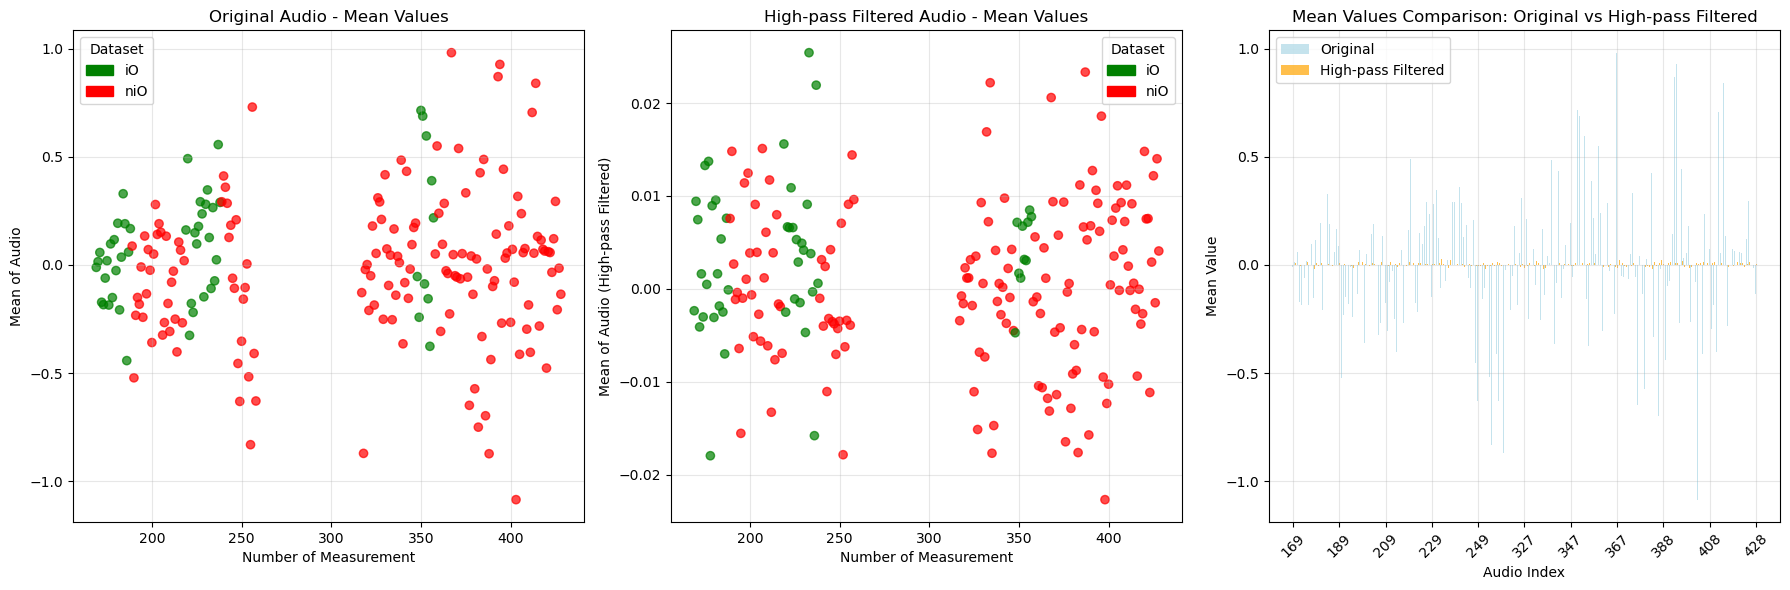


STATISTICAL COMPARISON
Original Audio Mean Statistics:
  Overall Mean: 0.003
  Standard Deviation: 0.328
  Min: -1.086
  Max: 0.981

High-pass Filtered Audio Mean Statistics:
  Overall Mean: 0.001
  Standard Deviation: 0.009
  Min: -0.023
  Max: 0.025

Mean Difference (Original - Filtered):
  Average Difference: 0.002
  Standard Deviation of Difference: 0.329
  Max Absolute Difference: 1.089

Statistics by Dataset:

iO Label of Audio:
  Original Mean: 0.079 ± 0.265
  Filtered Mean: 0.004 ± 0.008
  Count: 50 samples

niO Label of Audio:
  Original Mean: -0.022 ± 0.344
  Filtered Mean: 0.000 ± 0.009
  Count: 151 samples


In [54]:
# Calculate mean of original audio data based on M column
mean_list_original = [df['audio']["M"].values.mean() for df in audio_list_with_labels]
id_list = [audio_data['id'] for audio_data in audio_list_with_labels]
label_list = [audio_data['label'] for audio_data in audio_list_with_labels]
mean_df_original = pd.DataFrame({
    "Number of Measurement": id_list,
    "Mean of Audio": mean_list_original,
    "Label of Audio": label_list
})


# Calculate mean of filtered audio data based on M column
mean_list_filtered = [audio_data["audio"]["M"].values.mean() for audio_data in Audio_list_filt]
id_filtered = [audio_data["id"] for audio_data in Audio_list_filt]
label_filtered = [audio_data['label'] for audio_data in Audio_list_filt]
mean_df_filtered = pd.DataFrame({
    "Number of Measurement": id_filtered,
    "Mean of Audio Filtered": mean_list_filtered,
    "Label of Audio": label_filtered
})

# Combine both datasets for comparison
Audio_mean_comparison = mean_df_original.merge(
    mean_df_filtered[["Number of Measurement", "Mean of Audio Filtered"]], 
    on="Number of Measurement", 
    how="left"
)

print("Combined mean comparison data:")
print(Audio_mean_comparison.head())
print(f"Data shape: {Audio_mean_comparison.shape}")

# Create color mapping for datasets
colors = Audio_mean_comparison['Label of Audio'].map({'iO': 'green', 'niO': 'red'})

# Create subplot comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Original audio means
axes[0].scatter(Audio_mean_comparison['Number of Measurement'], 
                Audio_mean_comparison['Mean of Audio'], 
                c=colors, alpha=0.7)
axes[0].set_xlabel("Number of Measurement")
axes[0].set_ylabel("Mean of Audio")
axes[0].set_title("Original Audio - Mean Values")
axes[0].grid(True, alpha=0.3)

# Create legend
legend_handles = [
    mpatches.Patch(color='green', label='iO'),
    mpatches.Patch(color='red', label='niO')
]
axes[0].legend(handles=legend_handles, title="Dataset")

# Plot 2: Filtered audio means
axes[1].scatter(Audio_mean_comparison['Number of Measurement'], 
                Audio_mean_comparison['Mean of Audio Filtered'], 
                c=colors, alpha=0.7)
axes[1].set_xlabel("Number of Measurement")
axes[1].set_ylabel("Mean of Audio (High-pass Filtered)")
axes[1].set_title("High-pass Filtered Audio - Mean Values")
axes[1].grid(True, alpha=0.3)
axes[1].legend(handles=legend_handles, title="Dataset")

# Plot 3: Side-by-side comparison
x_positions = np.arange(len(Audio_mean_comparison))
width = 0.35

# Create bar plots for comparison
bars1 = axes[2].bar(x_positions - width/2, Audio_mean_comparison['Mean of Audio'], 
                   width, label='Original', alpha=0.7, color='lightblue')
bars2 = axes[2].bar(x_positions + width/2, Audio_mean_comparison['Mean of Audio Filtered'], 
                   width, label='High-pass Filtered', alpha=0.7, color='orange')

axes[2].set_xlabel("Audio Index")
axes[2].set_ylabel("Mean Value")
axes[2].set_title("Mean Values Comparison: Original vs High-pass Filtered")
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# Set x-axis labels to show actual measurement numbers (optional, might be crowded)
if len(Audio_mean_comparison) <= 20:  # Only show labels if not too many data points
    axes[2].set_xticks(x_positions)
    axes[2].set_xticklabels(Audio_mean_comparison['Number of Measurement'], rotation=45)
else:
    axes[2].set_xticks(x_positions[::len(x_positions)//10])  # Show every 10th label
    axes[2].set_xticklabels(Audio_mean_comparison['Number of Measurement'].iloc[::len(x_positions)//10], rotation=45)

plt.tight_layout()
plt.show()

# Statistical comparison
print("\n" + "="*50)
print("STATISTICAL COMPARISON")
print("="*50)
print(f"Original Audio Mean Statistics:")
print(f"  Overall Mean: {Audio_mean_comparison['Mean of Audio'].mean():.3f}")
print(f"  Standard Deviation: {Audio_mean_comparison['Mean of Audio'].std():.3f}")
print(f"  Min: {Audio_mean_comparison['Mean of Audio'].min():.3f}")
print(f"  Max: {Audio_mean_comparison['Mean of Audio'].max():.3f}")

print(f"\nHigh-pass Filtered Audio Mean Statistics:")
print(f"  Overall Mean: {Audio_mean_comparison['Mean of Audio Filtered'].mean():.3f}")
print(f"  Standard Deviation: {Audio_mean_comparison['Mean of Audio Filtered'].std():.3f}")
print(f"  Min: {Audio_mean_comparison['Mean of Audio Filtered'].min():.3f}")
print(f"  Max: {Audio_mean_comparison['Mean of Audio Filtered'].max():.3f}")

# Calculate difference statistics
mean_difference = Audio_mean_comparison['Mean of Audio'] - Audio_mean_comparison['Mean of Audio Filtered']
print(f"\nMean Difference (Original - Filtered):")
print(f"  Average Difference: {mean_difference.mean():.3f}")
print(f"  Standard Deviation of Difference: {mean_difference.std():.3f}")
print(f"  Max Absolute Difference: {abs(mean_difference).max():.3f}")

# Group statistics by dataset
print(f"\nStatistics by Dataset:")
for dataset in ['iO', 'niO']:
    mask = Audio_mean_comparison['Label of Audio'] == dataset
    if mask.any():
        orig_means = Audio_mean_comparison.loc[mask, 'Mean of Audio']
        filt_means = Audio_mean_comparison.loc[mask, 'Mean of Audio Filtered']
        print(f"\n{dataset} Label of Audio:")
        print(f"  Original Mean: {orig_means.mean():.3f} ± {orig_means.std():.3f}")
        print(f"  Filtered Mean: {filt_means.mean():.3f} ± {filt_means.std():.3f}")
        print(f"  Count: {mask.sum()} samples")
        

### Std

Combined std comparison data:
   Number of Measurement  Std of Audio Label of Audio  Std of Audio Filtered
0                    169   1485.917267             iO             761.644741
1                    170   1353.614509             iO             730.995281
2                    171   1607.308788             iO             857.518538
3                    172   1684.633736             iO             870.943602
4                    173   1668.711885             iO             846.781460
Data shape: (201, 4)


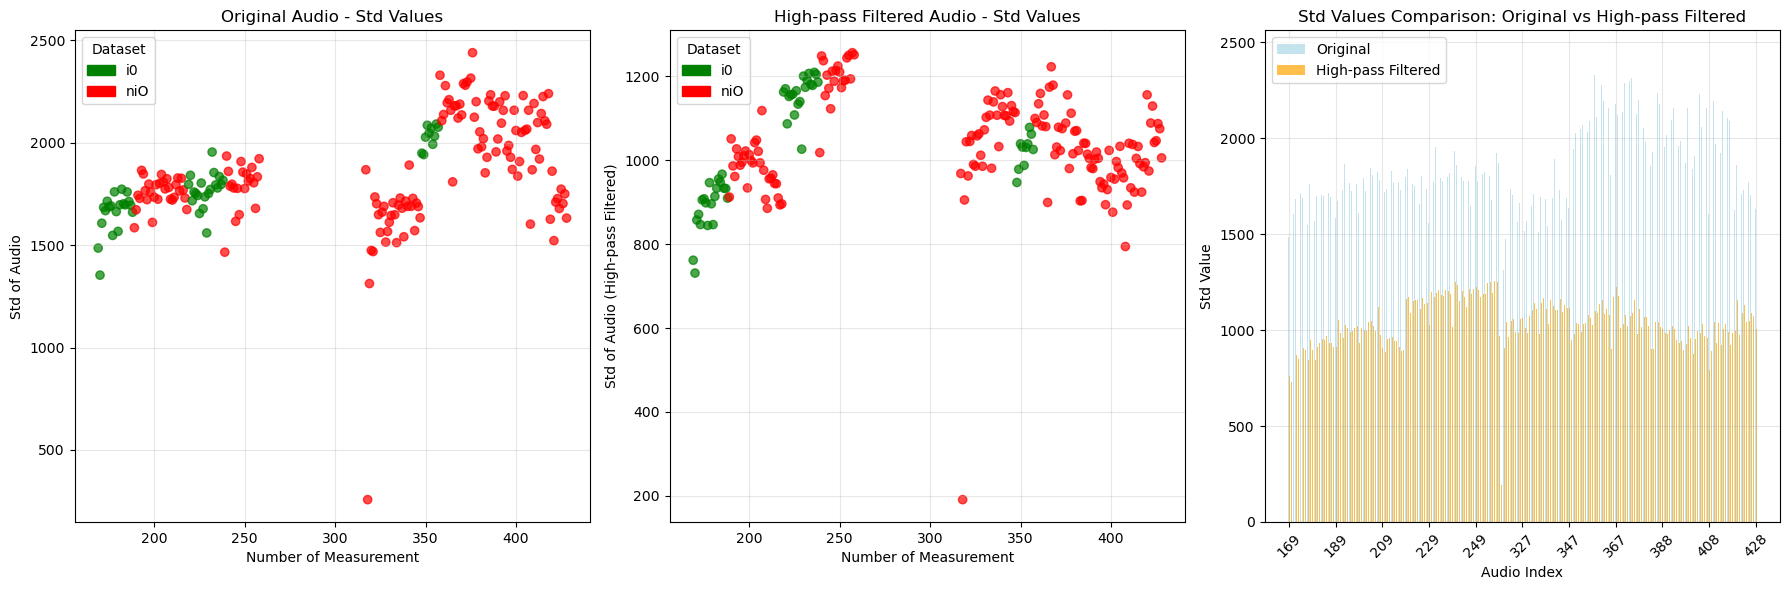


STATISTICAL COMPARISON
Original Audio Std Statistics:
  Overall Mean: 1840.450
  Standard Deviation: 243.568
  Min: 257.260
  Max: 2439.949

High-pass Filtered Audio Std Statistics:
  Overall Mean: 1035.761
  Standard Deviation: 122.166
  Min: 190.817
  Max: 1256.405

Std Difference (Original - Filtered):
  Average Difference: 804.689
  Standard Deviation of Difference: 229.927
  Max Absolute Difference: 1284.212

Statistics by Dataset:

niO Label of Audio:
  Original Std: 1861.504 ± 262.151
  Filtered Std: 1039.547 ± 119.051
  Count: 151 samples


In [56]:
# Calculate std of original audio data based on M column
std_list_original = [audio_data['audio']["M"].values.std() for audio_data in audio_list_with_labels]
id_list = [audio_data['id'] for audio_data in audio_list_with_labels]
label_list = [audio_data['label'] for audio_data in audio_list_with_labels]
std_df_original = pd.DataFrame({
    "Number of Measurement": id_list,
    "Std of Audio": std_list_original,
    "Label of Audio": label_list
})

# Calculate std of filtered audio data based on M column
std_list_filtered = [audio_data["audio"]["M"].values.std() for audio_data in Audio_list_filt]
id_filtered = [audio_data["id"] for audio_data in Audio_list_filt]
label_filtered = [audio_data['label'] for audio_data in Audio_list_filt]
std_df_filtered = pd.DataFrame({
    "Number of Measurement": id_filtered,
    "Std of Audio Filtered": std_list_filtered,
    "Label of Audio": label_filtered
})

# Combine both datasets for comparison
Audio_std_comparison = std_df_original.merge(
    std_df_filtered[["Number of Measurement", "Std of Audio Filtered"]], 
    on="Number of Measurement", 
    how="left"
)

print("Combined std comparison data:")
print(Audio_std_comparison.head())
print(f"Data shape: {Audio_std_comparison.shape}")

# Create color mapping for datasets
colors = Audio_std_comparison['Label of Audio'].map({'iO': 'green', 'niO': 'red'})

# Create subplot comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Original audio stds
axes[0].scatter(Audio_std_comparison['Number of Measurement'], 
                Audio_std_comparison['Std of Audio'], 
                c=colors, alpha=0.7)
axes[0].set_xlabel("Number of Measurement")
axes[0].set_ylabel("Std of Audio")
axes[0].set_title("Original Audio - Std Values")
axes[0].grid(True, alpha=0.3)

# Create legend
legend_handles = [
    mpatches.Patch(color='green', label='i0'),
    mpatches.Patch(color='red', label='niO')
]
axes[0].legend(handles=legend_handles, title="Dataset")

# Plot 2: Filtered audio stds
axes[1].scatter(Audio_std_comparison['Number of Measurement'], 
                Audio_std_comparison['Std of Audio Filtered'], 
                c=colors, alpha=0.7)
axes[1].set_xlabel("Number of Measurement")
axes[1].set_ylabel("Std of Audio (High-pass Filtered)")
axes[1].set_title("High-pass Filtered Audio - Std Values")
axes[1].grid(True, alpha=0.3)
axes[1].legend(handles=legend_handles, title="Dataset")

# Plot 3: Side-by-side comparison
x_positions = np.arange(len(Audio_std_comparison))
width = 0.35

# Create bar plots for comparison
bars1 = axes[2].bar(x_positions - width/2, Audio_std_comparison['Std of Audio'], 
                   width, label='Original', alpha=0.7, color='lightblue')
bars2 = axes[2].bar(x_positions + width/2, Audio_std_comparison['Std of Audio Filtered'], 
                   width, label='High-pass Filtered', alpha=0.7, color='orange')

axes[2].set_xlabel("Audio Index")
axes[2].set_ylabel("Std Value")
axes[2].set_title("Std Values Comparison: Original vs High-pass Filtered")
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# Set x-axis labels to show actual measurement numbers (optional, might be crowded)
if len(Audio_std_comparison) <= 20:  # Only show labels if not too many data points
    axes[2].set_xticks(x_positions)
    axes[2].set_xticklabels(Audio_std_comparison['Number of Measurement'], rotation=45)
else:
    axes[2].set_xticks(x_positions[::len(x_positions)//10])  # Show every 10th label
    axes[2].set_xticklabels(Audio_std_comparison['Number of Measurement'].iloc[::len(x_positions)//10], rotation=45)

plt.tight_layout()
plt.show()

# Statistical comparison
print("\n" + "="*50)
print("STATISTICAL COMPARISON")
print("="*50)
print(f"Original Audio Std Statistics:")
print(f"  Overall Mean: {Audio_std_comparison['Std of Audio'].mean():.3f}")
print(f"  Standard Deviation: {Audio_std_comparison['Std of Audio'].std():.3f}")
print(f"  Min: {Audio_std_comparison['Std of Audio'].min():.3f}")
print(f"  Max: {Audio_std_comparison['Std of Audio'].max():.3f}")

print(f"\nHigh-pass Filtered Audio Std Statistics:")
print(f"  Overall Mean: {Audio_std_comparison['Std of Audio Filtered'].mean():.3f}")
print(f"  Standard Deviation: {Audio_std_comparison['Std of Audio Filtered'].std():.3f}")
print(f"  Min: {Audio_std_comparison['Std of Audio Filtered'].min():.3f}")
print(f"  Max: {Audio_std_comparison['Std of Audio Filtered'].max():.3f}")

# Calculate difference statistics
std_difference = Audio_std_comparison['Std of Audio'] - Audio_std_comparison['Std of Audio Filtered']
print(f"\nStd Difference (Original - Filtered):")
print(f"  Average Difference: {std_difference.mean():.3f}")
print(f"  Standard Deviation of Difference: {std_difference.std():.3f}")
print(f"  Max Absolute Difference: {abs(std_difference).max():.3f}")

# Group statistics by dataset
print(f"\nStatistics by Dataset:")
for dataset in ['i0', 'niO']:
    mask = Audio_std_comparison['Label of Audio'] == dataset
    if mask.any():
        orig_stds = Audio_std_comparison.loc[mask, 'Std of Audio']
        filt_stds = Audio_std_comparison.loc[mask, 'Std of Audio Filtered']
        print(f"\n{dataset} Label of Audio:")
        print(f"  Original Std: {orig_stds.mean():.3f} ± {orig_stds.std():.3f}")
        print(f"  Filtered Std: {filt_stds.mean():.3f} ± {filt_stds.std():.3f}")
        print(f"  Count: {mask.sum()} samples")

After that we can find a outlier around 318


In [61]:
std_values = std_df_filtered["Std of Audio Filtered"].values

mean = np.mean(std_values)
std = np.std(std_values)

threshold_upper = mean + 2 * std
threshold_lower = mean - 2 * std

outliers = std_df_filtered[(std_df_filtered["Std of Audio Filtered"] > threshold_upper) | (std_df_filtered["Std of Audio Filtered"] < threshold_lower)]
print(outliers)

    Number of Measurement  Std of Audio Filtered Label of Audio
0                     169             761.644741             iO
1                     170             730.995281             iO
91                    318             190.817065            niO


### RMS

   Number of Measurement  RMS of Audio Dataset
0                    169   1485.917267      iO
1                    170   1353.614509      iO
2                    171   1607.308789      iO
3                    172   1684.633745      iO
4                    173   1668.711895      iO


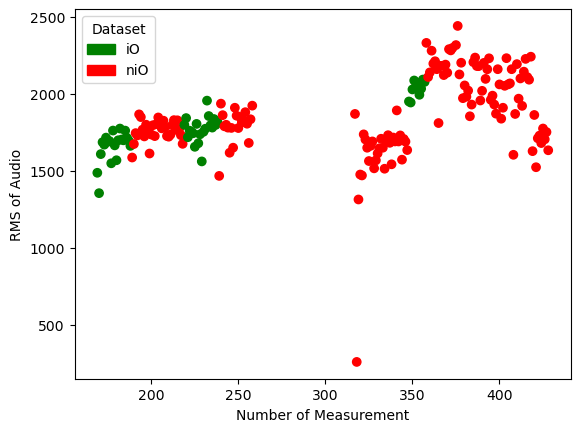

In [32]:
#get RMS of Audio based on M
RMS_list = [np.sqrt((df["M"]**2).mean()) for df in list_Audio]
RMS_df = pd.DataFrame({
    "Number of Measurement": id_Audio,
    "RMS of Audio": RMS_list
})
#merge RMS with Dataset of excel
Audio_RMS_df = RMS_df.merge(df_Usage, on="Number of Measurement", how="left")
print(Audio_RMS_df.head())

colors = Audio_RMS_df['Dataset'].map({'iO': 'green', 'niO': 'red'})
plt.scatter(Audio_RMS_df['Number of Measurement'],Audio_RMS_df['RMS of Audio'],c=colors)
plt.xlabel("Number of Measurement")
plt.ylabel("RMS of Audio")
legend_handles = [
    mpatches.Patch(color='green', label='iO'),
    mpatches.Patch(color='red', label='niO')
]
plt.legend(handles=legend_handles, title="Dataset")
plt.show()


it`s not meaningful, because RMS and std have similar structure, so they have almost same picture.

### Duration time of weld process

   Number of Measurement  Duration of Audio Dataset
0                    169           9.941333      iO
1                    170           7.936000      iO
2                    171           7.104000      iO
3                    172           7.392000      iO
4                    173           7.488000      iO


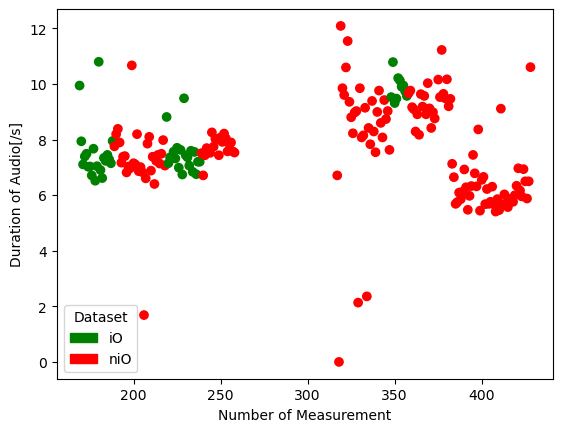

In [22]:
# compute duration time of weld process based on MFCC[0]
sr=48000
Duration = []
for df in list_Audio:
    mfccs_audio = librosa.feature.mfcc(y=df["M"].values.astype(np.float32), sr=sr, n_mfcc=13)
    duration = get_mfcc0_duration_over_threshold(mfccs_audio, 700, sr=sr)
    Duration.append(duration)

Duration_df = pd.DataFrame({
    "Number of Measurement": id_Audio,
    "Duration of Audio": Duration
})
#merge uration with Dataset of excel
Audio_Duration_df_df = Duration_df.merge(df_Usage, on="Number of Measurement", how="left")
print(Audio_Duration_df_df.head())

colors = Audio_Duration_df_df['Dataset'].map({'iO': 'green', 'niO': 'red'})
plt.scatter(Audio_Duration_df_df['Number of Measurement'],Audio_Duration_df_df['Duration of Audio'],c=colors)
plt.xlabel("Number of Measurement")
plt.ylabel("Duration of Audio[/s]")
legend_handles = [
    mpatches.Patch(color='green', label='iO'),
    mpatches.Patch(color='red', label='niO')
]
plt.legend(handles=legend_handles, title="Dataset")
plt.show()

### FFT of all data


Extracting dominant frequencies from 201 filtered audio files...

Extraction complete! Successfully processed 201 audio files

Results preview:
   Measurement Number  Dominant Frequency Label
0                 169          311.497996    iO
1                 170          311.549574    iO
2                 171          122.697368    iO
3                 172          122.804330    iO
4                 173          122.792751    iO
5                 174          123.152314    iO
6                 175          122.641509    iO
7                 176          122.233280    iO
8                 177          122.119035    iO
9                 178          122.188808    iO


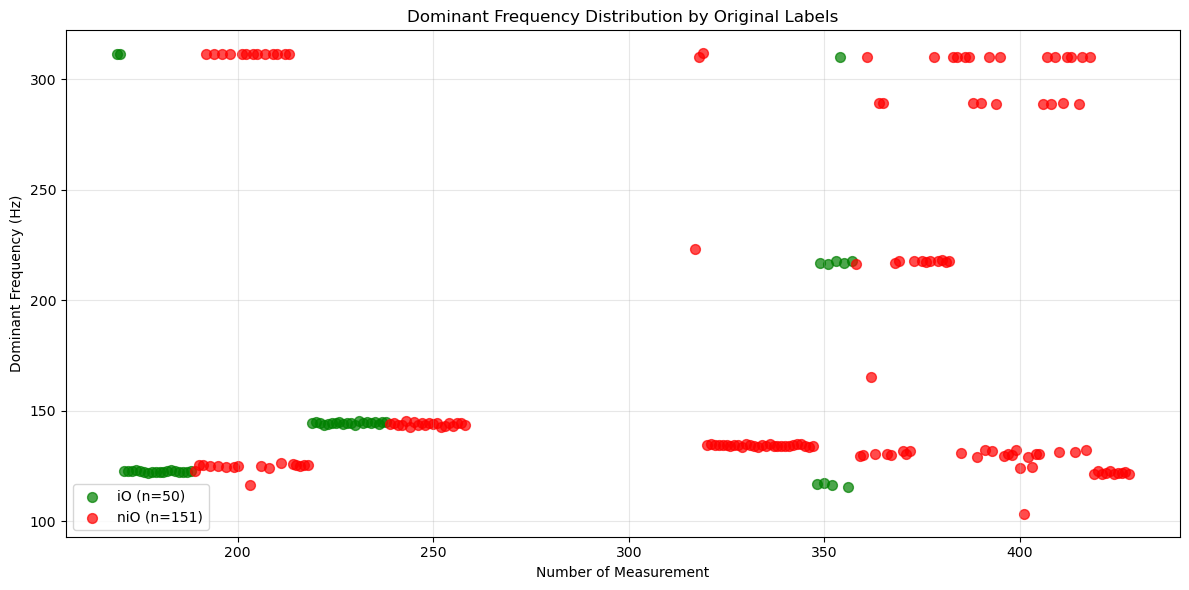


Dominant frequency statistics by original labels:
iO: Mean = 151.6 Hz, Std = 49.2 Hz, Range = [115.6, 311.5] Hz, Count = 50
niO: Mean = 182.8 Hz, Std = 75.5 Hz, Range = [103.5, 311.7] Hz, Count = 151


In [ ]:

# Lists to store results
freq_list = []  # List to store dominant frequencies
measurement_list = []  # List to store measurement numbers
label_list = []  # List to store original labels

print(f"Extracting dominant frequencies from {len(Audio_list_filt)} filtered audio files...")

# Loop through all filtered audio data
for audio_data in Audio_list_filt:
    
        # Extract data from the filtered audio
        measurement_number = audio_data['id']
        df_filtered = audio_data['audio']  # Already filtered data
        original_label = audio_data['label']
        
        #print(f"Processing audio ID: {measurement_number}")
        
        # Extract time and filtered measurement data
        t = df_filtered['Time'].values  # Time column
        m_filtered = df_filtered['M'].values  # Filtered measurement column
        
        # Calculate sampling frequency from time data
        fs = 1 / (t[1] - t[0])  # Sampling frequency
        
        # Compute FFT on the filtered signal
        N = len(m_filtered)  # Number of samples
        yf = fft(m_filtered)  # Perform Fast Fourier Transform (FFT)
        xf = fftfreq(N, 1 / fs)  # Generate frequency bins
        
        # Take positive frequencies only
        positive_idxs = xf > 0
        xf_positive = xf[positive_idxs]  # Positive frequencies
        yf_positive = np.abs(yf[positive_idxs])  # Corresponding magnitudes
        
        # Find dominant frequency (frequency with maximum magnitude)
        dom_freq = xf_positive[np.argmax(yf_positive)]
        
        #print(f"  Dominant frequency: {dom_freq:.1f} Hz")
        
        # Store results
        freq_list.append(dom_freq)
        measurement_list.append(measurement_number)
        label_list.append(original_label)
        
    

# Create DataFrame with results
dominant_freq_df = pd.DataFrame({
    'Measurement Number': measurement_list,
    'Dominant Frequency': freq_list,
    'Label': label_list
})

print(f"\nExtraction complete! Successfully processed {len(dominant_freq_df)} audio files")
print("\nResults preview:")
print(dominant_freq_df.head(10))

# Create scatter plot based on original labels
plt.figure(figsize=(12, 6))

# Define colors for different labels
color_map = {'iO': 'green', 
             'niO': 'red'}

# Plot scatter points for each label
for label in dominant_freq_df['Label'].unique():
    subset = dominant_freq_df[dominant_freq_df['Label'] == label]
    color = color_map.get(label, 'blue')  # Default to blue if label not in map
    plt.scatter(subset['Measurement Number'], subset['Dominant Frequency'], 
               color=color, label=f'{label} (n={len(subset)})', alpha=0.7, s=50)

plt.xlabel("Number of Measurement")
plt.ylabel("Dominant Frequency (Hz)")
plt.title("Dominant Frequency Distribution by Original Labels")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display frequency statistics by label
print(f"\nDominant frequency statistics by original labels:")
for label in dominant_freq_df['Label'].unique():
    subset = dominant_freq_df[dominant_freq_df['Label'] == label]
    freq_stats = subset['Dominant Frequency']
    print(f"{label}: Mean = {freq_stats.mean():.1f} Hz, Std = {freq_stats.std():.1f} Hz, "
          f"Range = [{freq_stats.min():.1f}, {freq_stats.max():.1f}] Hz, Count = {len(subset)}")


### Weldqas part

# read single file

file_path = os.path.join(Weldqas_path,"169.csv")
df = pd.read_csv(file_path)
#pd.set_option('display.max_rows', None)
print(df)
df.info()
x = df["Time"]
y = df["M"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("M ")


      Time [s]  Current [A]  Voltage [V]  Wire [m/min]
0     0.000000         11.7         0.83           0.0
1     0.000043         12.7         0.68           0.0
2     0.000085         13.2         0.68           0.0
3     0.000128         15.6         0.54           0.0
4     0.000170         15.2         0.00           0.0
...        ...          ...          ...           ...
4696  0.199583         18.1         0.00           0.0
4697  0.199626         16.1        -0.54           0.0
4698  0.199668         14.2        -0.54           0.0
4699  0.199711         12.7        -0.54           0.0
4700  0.199754         11.2        -0.54           0.0

[4701 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time [s]      4701 non-null   float64
 1   Current [A]   4701 non-null   float64
 2   Voltage [V]   4701 non-null   fl

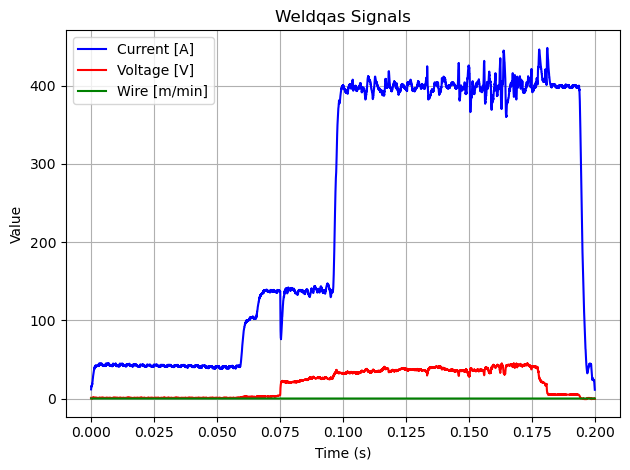

In [5]:
# read single file

file_path = os.path.join(Weldqas_path,"169.csv")
df = pd.read_csv(file_path)
#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')
print(df)
df.info()
"""
plt.figure(1)
x = df["Time [s]"]
y = df["Current [A]"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.figure(2)
x = df["Time [s]"]
y = df["Voltage [V]"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.figure(3)
x = df["Time [s]"]
y = df["Wire [m/min]"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("Wire (m/min)")
"""
plt.plot(df["Time [s]"], df["Current [A]"], label="Current [A]", color="blue")
plt.plot(df["Time [s]"], df["Voltage [V]"], label="Voltage [V]", color="red")
plt.plot(df["Time [s]"], df["Wire [m/min]"], label="Wire [m/min]", color="green")

plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.title("Weldqas Signals")
plt.legend()  
plt.grid(True)
plt.tight_layout()
plt.show()


